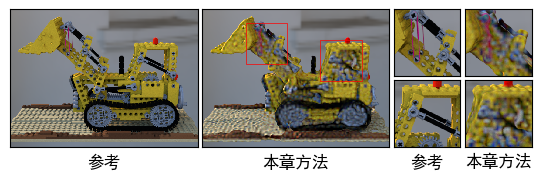

In [2]:
%reload_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.abspath('../'))
from common import *
import configs
import matplotlib.patches as patches
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体

fig_name = 'limitations'
fig_dir = join(FIGURE_DIR, fig_name)

scenes = ['lego']
crops = [(300,200,100,100)]
crops = [(0.17,0.85,0.2,0.7)]
# crops = [(1,1,1,1)]
insets = [[(0.33, 0.5, 0.15), (0.6, 0.44, 0.15)]]
exposures = [1.0]
config = configs.Warp()

fontsize = 12
base_size = 4
n_rows = len(scenes) 
n_cols = 3
total_width = COLUMN_WIDTH
aspect = n_rows / n_cols
fig = plt.figure(1, figsize=(total_width, aspect * total_width), constrained_layout=False)

gs = fig.add_gridspec(2*n_rows, 2*n_cols, wspace=0.05, hspace=-0.3, width_ratios=[1, 1, 1, 1, 0.73, 0.73])
row = 0
title_offset = -0.1
inset_label_offset = -0.2
names = ['参考', '本章方法']
for scene_name, crop, exposure, curr_insets in zip(scenes, crops, exposures, insets):
    col = 0
    ax = fig.add_subplot(gs[row:row+2, 2*col:2*col+2])
    ref_img = read_img(join(fig_dir, scene_name, 'ref.exr'), exposure=exposure)
    ax.imshow(ref_img, interpolation='none', extent=[0,1,0,1])
    ax.set_xlim(crop[0], crop[1])
    ax.set_ylim(crop[2], crop[3])
    disable_ticks(ax)
    if row == 0:
        txt = ax.set_title(names[col], fontsize=fontsize, va='top', y=title_offset)
    col += 1
    
    ax = fig.add_subplot(gs[row:row+2, 2*col:2*col+2])
    img = read_img(join(fig_dir, scene_name, f'{config.name}.exr'), exposure=exposure)
    h_orig = img.shape[0]
    ax.imshow(img, interpolation='none', extent=[0,1,0,1])
    ax.set_xlim(crop[0], crop[1])
    ax.set_ylim(crop[2], crop[3])
    disable_ticks(ax)
    if row == 0:
        txt = ax.set_title(names[col], fontsize=fontsize, va='top', y=title_offset)
    col += 1

    for inset in curr_insets:
        rect = patches.Rectangle((inset[0], inset[1]), inset[2], inset[2], linewidth=0.5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # # ax.arrow(0.7, 0.52, 0.02, -0.09, head_width=0.02, 
    # #         length_includes_head=True, facecolor='r', edgecolor='r')
    # # ax.arrow(0.4, 0.6, -0.02, -0.09, head_width=0.02, 
    # #         length_includes_head=True, facecolor='r', edgecolor='r')
    for r, inset in enumerate(curr_insets):
        ax = fig.add_subplot(gs[r, 4])
        i, j = (int(ref_img.shape[0] * (1-inset[1])), int(ref_img.shape[1] * inset[0]))
        h, w = ref_img.shape[:2]
        ref_crop = ref_img[(i - int(inset[2] * h)):i, j:(j + int(inset[2] * w))]
        ax.imshow(ref_crop, interpolation='none')
        disable_ticks(ax)
        if r == 1:
            txt = ax.set_title("参考", fontsize=fontsize, va='top', y=inset_label_offset)

        ax = fig.add_subplot(gs[r, 5])
        img_crop = img[(i - int(inset[2] * h)):i, j:(j + int(inset[2] * w))]
        ax.imshow(img_crop, interpolation='none')
        disable_ticks(ax)
        if r == 1:
            txt = ax.set_title("本章方法", fontsize=fontsize, va='top', y=inset_label_offset)

plt.margins(0, 0)
# save_fig(fig_name)
